In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import ClassicalModel as CM
import torch
import models_parallel as models
import random


def fun(x):
    return np.heaviside(x,0)
def fun2(x):
    return np.sin(np.pi*x)

input_eval  = np.linspace(-1,1,200)
y_true      = fun(input_eval)
y_true2     = fun2(input_eval)

## for layer

In [ ]:
activation_fuction = [torch.nn.Tanh(),torch.nn.Sigmoid(),torch.nn.ReLU()]
name_function = ["Tanh","Sigmoid","Relu"]

# Classico
for i in range(len(activation_fuction)):
    menor_pred = y_true2.reshape(-1,1)
    erro        = 1
    number_of_layers = 0 
    sample_index = 0
    for N_of_layer in range(1,6):
        for manualSeed in range(1,100):
                   
            np.random.seed(manualSeed)
            random.seed(manualSeed)
            torch.manual_seed(manualSeed)
                
            modelo  = CM.ClassicalModel(
                epochs      = 1000,
                neuronio    = [1]*N_of_layer,
                activation  = activation_fuction[i],
                lr          = 0.01
            )
            modelo.load_checkpoint(checkpoint_path=f"Data/classical/sino_comparing_by_layer/seed{manualSeed}_layer{N_of_layer}_{name_function[i]}")
            predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
            erro_t  = np.mean(((predict-y_true2.reshape(-1,1))**2))
            if erro_t < erro:
                erro = erro_t
                menor_pred = predict
                number_of_layers = N_of_layer
                sample_index = manualSeed
    print(f"{name_function[i]} - Erro: ",erro," Nº of layer:",number_of_layers ," sample_index:",sample_index)
 
  
# Classico
for i in range(len(activation_fuction)):
    menor_pred = y_true2.reshape(-1,1)
    erro        = 1
    number_of_layers = 0 
    sample_index = 0
    for N_of_layer in range(1,6):
        for manualSeed in range(1,100):
                   
            np.random.seed(manualSeed)
            random.seed(manualSeed)
            torch.manual_seed(manualSeed)
                
            modelo  = CM.ClassicalModel(
                epochs      = 1000,
                neuronio    = [1]*N_of_layer,
                activation  = activation_fuction[i],
                lr          = 0.01
            )
            modelo.load_checkpoint(checkpoint_path=f"Data/classical/Heaviside_comparing_by_layer/seed{manualSeed}_layer{N_of_layer}_{name_function[i]}")
            predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
            erro_t  = np.mean((predict-y_true.reshape(-1,1))**2)
            if erro_t < erro:
                erro = erro_t
                menor_pred = predict
                number_of_layers = N_of_layer
                sample_index = manualSeed
    print(f"{name_function[i]} - Erro: ",erro," Nº of layer:",number_of_layers ," sample_index:",sample_index)


c:\Users\Gubio\OneDrive\Desktop\Gubio\cv-torchgates\Comparison\ClassicalModel.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Tanh - Erro:  0.06616946224408521  Nº of layer: 5  sample_index: 77
Sigmoid - Erro:  0.06626411324988467  Nº of layer: 5  sample_index: 48
Relu - Erro:  0.06480299534041704  Nº of layer: 3  sample_index: 56
Tanh - Erro:  0.0003102706465896743  Nº of layer: 5  sample_index: 34
Sigmoid - Erro:  0.00019000881230560651  Nº of layer: 5  sample_index: 50
Relu - Erro:  0.003967027619826377  Nº of layer: 2  sample_index: 38


c:\Users\Gubio\OneDrive\Desktop\Gubio\cv-torchgates\Comparison\ClassicalModel.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
c

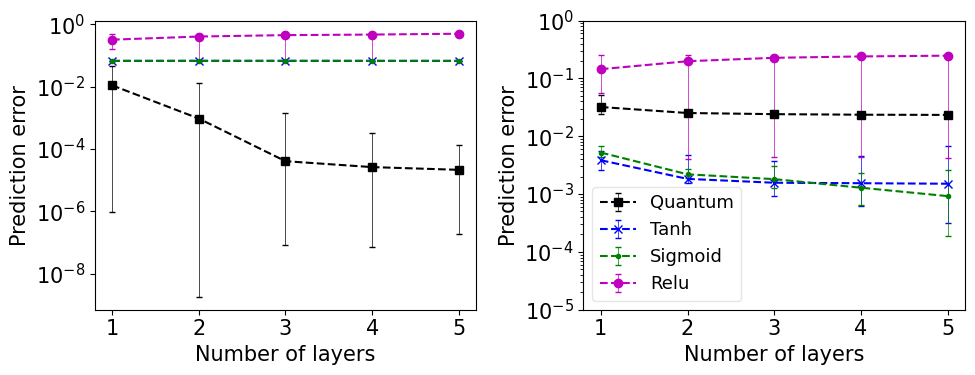

In [ ]:
activation_fuction = [torch.nn.Tanh(),torch.nn.Sigmoid(),torch.nn.ReLU()]
name_function = ["Tanh","Sigmoid","Relu"]
color =  ['b--x','g--.','m--o']

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(10,4))
plt.rcParams.update({'font.size': 15})
# Classico
for i in range(len(activation_fuction)):
    
    erro = []
    for N_of_layer in range(1,6):
        ram = []
        for manualSeed in range(1,100):
                    
            np.random.seed(manualSeed)
            random.seed(manualSeed)
            torch.manual_seed(manualSeed)
            if torch.cuda.is_available():
                torch.cuda.manual_seed(manualSeed)
                torch.cuda.manual_seed_all(manualSeed)
                torch.backends.cudnn.deterministic = True
                
            modelo  = CM.ClassicalModel(
                epochs      = 1000,
                neuronio    = [1]*N_of_layer,
                activation  = activation_fuction[i],
                lr          = 0.01
            )
            modelo.load_checkpoint(checkpoint_path=f"Data/classical/sino_comparing_by_layer/seed{manualSeed}_layer{N_of_layer}_{name_function[i]}")
            predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
            ram.append( np.mean(((predict-y_true2.reshape(-1,1))**2)))
        erro.append(ram)
    erro    = np.array(erro)  
    minimo  = erro.min(axis=1)
    media   = erro.mean(axis=1)
    maximo  = erro.max(axis=1)
    ax1.errorbar(
        range(1,6), 
        media,
        yerr=[abs(media-minimo),abs(maximo-media)],
        elinewidth=0.5,
        fmt=f'{color[i]}', 
        label=f'{name_function[i]}',
        capsize=2)

# Quântico
erro = []
for j in range(1,6):
    ram  = []
    for i in range(1,100):
        quantum = models.Train(D= 30,number_of_layers=j)
        try:
            quantum.load_checkpoint(checkpoint_path=f'Data/quantum/{j}layer/model_sin{i}.pth')
            predict = quantum.evaluate(input = input_eval)
            ram.append(np.mean((predict-y_true2)**2))
        except FileNotFoundError:
            ram.append(0)
            print(f"Arquivo {j}layer / model_sin{i} não encontrado ")
            continue
    erro.append(ram) 
    
erro    = np.array(erro)  
minimo  = erro.min(axis=1)
media   = erro.mean(axis=1)
maximo  = erro.max(axis=1)
ax1.errorbar(
    range(1,6), 
    media,
    yerr=[abs(media-minimo),abs(maximo-media)],
    elinewidth=0.5,
    fmt='ks--', 
    label='Quantum',
    capsize=2)
# ax1.legend()
#ax1.set_title("Seno")
ax1.set_xlabel('Number of layers')
ax1.set_yscale("log")
ax1.set_ylabel('Prediction error')   
ax1.set_xticks([1, 2, 3, 4, 5])

###################################################################################################


# Quântico
erro = []
for j in range(1,6):
    ram  = []
    for i in range(1,100):
        quantum = models.Train(D= 30,number_of_layers=j)
        try:
            quantum.load_checkpoint(checkpoint_path=f'Data/quantum/{j}layer/model_heaviside{i}.pth')
            predict = quantum.evaluate(input = input_eval)
            ram.append(np.mean((predict-y_true)**2))
        except FileNotFoundError:
            print(f"Arquivo {j}layer / model_heaviside{i} não encontrado ")
            ram.append(0)
            continue
    erro.append(ram)    

erro    = np.array(erro)  
minimo  = erro.min(axis=1)
media   = erro.mean(axis=1)
maximo  = erro.max(axis=1)
ax2.errorbar(range(1,6), media,yerr=[abs(media-minimo),abs(maximo-media)],
            elinewidth=0.5,fmt='ks--', label='Quantum',capsize=2)


# Classico
for i in range(len(activation_fuction)):
    
    erro = []
    for N_of_layer in range(1,6):
        ram = []
        for manualSeed in range(1,100):
                    
            np.random.seed(manualSeed)
            random.seed(manualSeed)
            torch.manual_seed(manualSeed)
            if torch.cuda.is_available():
                torch.cuda.manual_seed(manualSeed)
                torch.cuda.manual_seed_all(manualSeed)
                torch.backends.cudnn.deterministic = True
                
            modelo  = CM.ClassicalModel(
                epochs      = 1000,
                neuronio    = [1]*N_of_layer,
                activation  = activation_fuction[i],
                lr          = 0.01
            )
            modelo.load_checkpoint(checkpoint_path=f"Data/classical/Heaviside_comparing_by_layer/seed{manualSeed}_layer{N_of_layer}_{name_function[i]}")
            predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
            ram.append( np.mean((predict-y_true.reshape(-1,1))**2))
        erro.append(ram)
    erro    = np.array(erro)  
    minimo  = erro.min(axis=1)
    #print(minimo)
    media   = erro.mean(axis=1)
    maximo  = erro.max(axis=1)
    ax2.errorbar(
        range(1,6), 
        media,
        yerr=[abs(media-minimo),abs(maximo-media)],
        elinewidth=0.5,
        fmt=f'{color[i]}', 
        label=f'{name_function[i]}',
        capsize=2)
    
ax2.set_xlabel('Number of layers')
ax2.set_yscale("log")
ax2.set_ylabel('Prediction error')
ax2.set_xticks([1, 2, 3, 4, 5])
ax2.set_ylim(10**(-5),1)  # eixo y de ax2 vai de 0 a 20
#ax2.set_title("Heaviside")
fig.tight_layout()
plt.legend(fontsize=13,framealpha=0.5,loc=3)
#ax2.text(0.3, 0.6, '(b)', fontsize=15)
plt.savefig("seno_heavi_camada.pdf",dpi=1000)

plt.show()

In [4]:
asass

NameError: name 'asass' is not defined

## For parameter

In [ ]:
from itertools import product
activation_fuction = [torch.nn.Tanh(),torch.nn.Sigmoid(),torch.nn.ReLU()]
name_function = ["Tanh","Sigmoid","Relu"]
def all_neuro(N_layer,numberofneuro):
    todas_combinacoes = []
    for n in range(1, N_layer + 1):
        todas_combinacoes.extend(product(range(1, numberofneuro + 1), repeat=n))

    todas_combinacoes_util=[]
    N_of_parameter = []
    index_all_combinatino = []
    for indice in range(len(todas_combinacoes)):
        modelo  = CM.ClassicalModel(
                epochs      = 1000,
                neuronio    = todas_combinacoes[indice],
                activation  = activation_fuction[0],
                lr          = 0.01) 
        if modelo.Number_of_parameter() in (5,10,15,20,25):
            todas_combinacoes_util.append( todas_combinacoes[indice])
            N_of_parameter.append(modelo.Number_of_parameter())
            index_all_combinatino.append(indice)
            
    # dt_Parametre = [ 
    #                 [3],
    #                 [1, 4],
    #                 [1, 2, 2],
    #                 [1, 1, 1, 2, 1],
    #                 [4, 1, 2],
    #                 [3, 1, 3],
    #                 [1, 1, 5],
    #                 [2, 2, 1, 2],
    #                 [8],
    #                 [5,8],
    #                 [1, 2, 1, 5],
    #                 [1, 2, 2, 1, 3],  
    #                 [1, 1, 2, 2, 2, 1],    
    #                 [4, 1, 2, 3], 
    #                 [2, 2, 3, 2],
    #                 [1, 1, 3, 1, 5],
    #                 [1, 1, 2, 2, 2, 1, 2],
    #                 [3, 2, 5],
    #                 [2, 5, 1, 3],
    #                 [5, 1, 3, 2, 1],
    #                 [2, 1, 2, 2, 1, 1, 1, 2, 1, 1]]
    # for indice in range(len(dt_Parametre)):
    #     modelo  = CM.ClassicalModel(
    #             step_size   = 500,
    #             epochs      = 1000,
    #             neuronio    = todas_combinacoes[indice],
    #             activation  = activation_fuction[0],
    #             lr          = 0.01) 
    #     if modelo.Number_of_parameter() in (5,10,15,20,25):
    #         todas_combinacoes_util.append( dt_Parametre[indice])
    return todas_combinacoes_util,N_of_parameter,index_all_combinatino
combination,number_combination_parameter,index_combination = all_neuro(3,10)      

epochs, lr, neuronio, activation,step_size_=500, device="cpu",output_=1,input_=1

In [ ]:
activation_fuction = [torch.nn.Tanh(),torch.nn.Sigmoid(),torch.nn.ReLU()]
name_function = ["Tanh","Sigmoid","Relu"]

# Classico
for index in range(len(name_function)):
    menor_pred  = y_true2.reshape(-1,1)
    erro        = 1
    number_of_i = 0 
    sample_index = 0
    for indice in range(len(combination)):
        ram = []
        for manualSeed in range(1,100):  
                                   
            modelo  = CM.ClassicalModel(
                epochs      = 10000,
                neuronio    = combination[indice],
                activation  = activation_fuction[index],
                lr          = 0.01)
            modelo.load_checkpoint(checkpoint_path=f"Data/classical/sino_comparing_by_parameter/seed{manualSeed}_indice{indice}_{name_function[index]}")
            predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
            erro_t  = np.mean(((predict-y_true2.reshape(-1,1))**2))
            if erro_t < erro:
                erro = erro_t
                menor_pred = predict
                number_of_i = indice
                sample_index = manualSeed
    print(f"{name_function[index]} - Erro: ",erro,"indice " , number_of_i ," sample_index:",sample_index)
 
#Classico
for index in range(len(name_function)):
    menor_pred     = y_true2.reshape(-1,1)
    erro           = 1
    number_of_i    = 0 
    sample_index   = 0
    for indice in range(len(combination)):
        ram = []
        for manualSeed in range(1,100):  
                                   
            modelo  = CM.ClassicalModel(
                epochs      = 10000,
                neuronio    = combination[indice],
                activation  = activation_fuction[index],
                lr          = 0.01)
            modelo.load_checkpoint(checkpoint_path=f"Data/classical/Heaviside_comparing_by_parameter/seed{manualSeed}_indice{indice}_{name_function[index]}")
            predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
            erro_t  = np.mean((predict-y_true.reshape(-1,1))**2)
            if erro_t < erro:
                erro            = erro_t
                menor_pred      = predict
                number_of_i     = indice
                sample_index    = manualSeed
    print(f"{name_function[index]} - Erro: ",erro,"indice " , number_of_i ," sample_index:",sample_index)


c:\Users\Gubio\OneDrive\Desktop\Gubio\cv-torchgates\Comparison\ClassicalModel.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Tanh - Erro:  1.8705573823948208e-08 indice  1  sample_index: 88
Sigmoid - Erro:  8.608443171576888e-08 indice  1  sample_index: 23
Relu - Erro:  0.0003518010740108815 indice  1  sample_index: 1
Tanh - Erro:  0.0008519623416184352 indice  13  sample_index: 48
Sigmoid - Erro:  0.0011093730699352378 indice  10  sample_index: 39
Relu - Erro:  0.0031215884821662186 indice  3  sample_index: 95


In [ ]:

color =  ['b','g','m']
# Classical
index =0
shift =-0.5
for index in range(len(name_function)):
    erro =[] 
    for indice in range(len(combination)):
        ram = []
        for manualSeed in range(1,100):      
            modelo  = CM.ClassicalModel(
                #step_size   = 500,
                epochs      = 10000,
                neuronio    = combination[indice],
                activation  = activation_fuction[index],
                lr          = 0.01)
            modelo.load_checkpoint(checkpoint_path=f"Data/classical/sino_comparing_by_parameter/seed{manualSeed}_indice{indice}_{name_function[index]}")
            predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
            ram.append( np.mean((predict-y_true2.reshape(-1,1))**2))
        erro.append(ram)

    erro    = np.array(erro)  
    media   = erro.mean()
    print(media)


# Quântico
erro = []
for j in range(5,6):
    ram  = []
    for i in range(1,100):
        quantum = models.Train(D= 30,number_of_layers=j)
        quantum.load_checkpoint(checkpoint_path=f'Data/quantum/{j}layer/model_sin{i}.pth')
        predict = quantum.evaluate(input= input_eval)
        ram.append(np.mean((predict-y_true2)**2))
    erro.append(ram) 
    
erro    = np.array(erro)  
media   = erro.mean()

print(media)


0.022347981038681165
0.044320723772011406
0.28748429224573807


c:\Users\Gubio\OneDrive\Desktop\Gubio\cv-torchgates\Comparison\models_parallel.py:195: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)

2.1303670227323533e-05


c:\Users\Gubio\OneDrive\Desktop\Gubio\cv-torchgates\Comparison\ClassicalModel.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
c

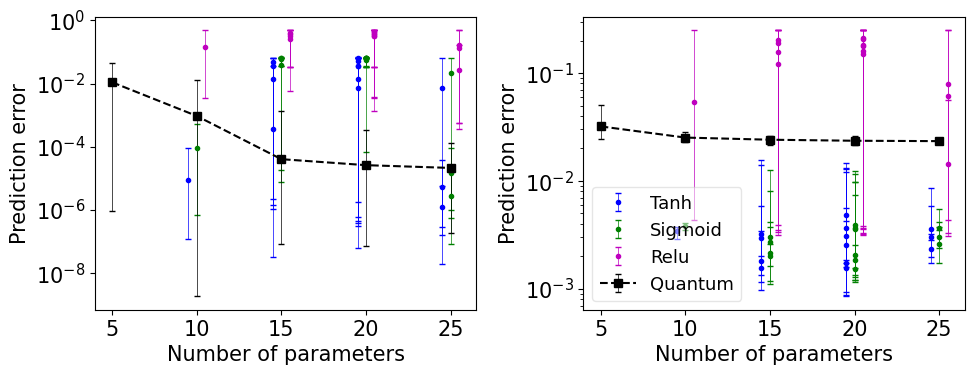

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(10,4))
plt.rcParams.update({'font.size': 15})
color =  ['b','g','m']
# Classical
index =0
shift =-0.5
for index in range(len(name_function)):
    erro =[] 
    for indice in range(len(combination)):
        ram = []
        for manualSeed in range(1,100):      
            modelo  = CM.ClassicalModel(
                #step_size   = 500,
                epochs      = 10000,
                neuronio    = combination[indice],
                activation  = activation_fuction[index],
                lr          = 0.01)
            modelo.load_checkpoint(checkpoint_path=f"Data/classical/sino_comparing_by_parameter/seed{manualSeed}_indice{indice}_{name_function[index]}")
            predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
            ram.append( np.mean((predict-y_true2.reshape(-1,1))**2))
        erro.append(ram)

    erro    = np.array(erro)  
    minimo  = erro.min(axis=1)
    media   = erro.mean(axis=1)
    maximo  = erro.max(axis=1)
    ax1.errorbar(
        np.array(number_combination_parameter)+shift, 
        media,
        yerr=[abs(media-minimo),abs(maximo-media)],
        elinewidth=0.5,
        fmt=f'{color[index]}.', 
        label=f'{name_function[index]}',
        capsize=2)   
    shift+=0.5 

# Quântico
erro = []
for j in range(1,6):
    ram  = []
    for i in range(1,100):
        quantum = models.Train(D= 30,number_of_layers=j)
        quantum.load_checkpoint(checkpoint_path=f'Data/quantum/{j}layer/model_sin{i}.pth')
        predict = quantum.evaluate(input= input_eval)
        ram.append(np.mean((predict-y_true2)**2))
    erro.append(ram) 
    
erro    = np.array(erro)  
minimo  = erro.min(axis=1)
media   = erro.mean(axis=1)
maximo  = erro.max(axis=1)
ax1.errorbar(
    [5,10,15,20,25], 
    media,
    yerr=[abs(media-minimo),abs(maximo-media)],
    elinewidth=0.5,
    fmt='ks--', 
    label='Quantum',
    capsize=2)
plt.legend(fontsize=13,framealpha=0.5)
ax1.set_xlabel('Number of parameters')
ax1.set_yscale("log")
ax1.set_ylabel('Prediction error')  
#ax1.set_title("Sen(x)")
############################################################################################

index =0
shift =-0.5
for index in range(len(name_function)):

    erro =[] 
    for indice in range(len(combination)):
        ram = []
        for manualSeed in range(1,100):
            
            modelo  = CM.ClassicalModel(
                #step_size   = 500,
                epochs      = 10000,
                neuronio    = combination[indice],
                activation  = activation_fuction[index],
                lr          = 0.01)
            modelo.load_checkpoint(checkpoint_path=f"Data/classical/Heaviside_comparing_by_parameter/seed{manualSeed}_indice{indice}_{name_function[index]}")
            predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
            ram.append( np.mean((predict-y_true.reshape(-1,1))**2))
        erro.append(ram)

    erro    = np.array(erro)  
    minimo  = erro.min(axis=1)
    media   = erro.mean(axis=1)
    maximo  = erro.max(axis=1)
    ax2.errorbar(
        np.array(number_combination_parameter)+shift, 
        media,
        yerr=[abs(media-minimo),abs(maximo-media)],
        elinewidth=0.5,
        fmt=f'{color[index]}.', 
        label=f'{name_function[index]}',
        capsize=2)
    ax2.set_yscale("log")
    ax2.set_xticks([0,5,10,15,20,25])
    ax2.set_ylabel('Prediction error')
    
    shift+=0.5    
    
# Quântico
erro = []
for j in range(1,6):
    ram  = []
    for i in range(1,100):
        quantum = models.Train(D= 30,number_of_layers=j)
        quantum.load_checkpoint(checkpoint_path=f'Data/quantum/{j}layer/model_Heaviside{i}.pth')
        predict = quantum.evaluate(input = input_eval)
        ram.append(np.mean((predict-y_true)**2))
    erro.append(ram)    

erro    = np.array(erro)  
minimo  = erro.min(axis=1)
media   = erro.mean(axis=1)
maximo  = erro.max(axis=1)
ax2.errorbar([5,10,15,20,25], media,yerr=[abs(media-minimo),abs(maximo-media)],
            elinewidth=0.5,fmt='ks--', label='Quantum',capsize=2)
#ax2.set_title("Heaviside(x)")  
ax2.set_xlabel('Number of parameters')
fig.tight_layout()
plt.legend(fontsize=13,framealpha=0.5,loc=3)
plt.savefig("plote_param.pdf",dpi=1000)
plt.show()
